In [70]:
import os
import sys
import subprocess
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import time
from ctypes import *
# import multiprocessing
%matplotlib widget


In [71]:
m_o = 16
m_n = 14
m_o2 = 32
m_n2 = 28
m_He = 4
m_H = 1
m_Ar = 40
m_p = 1.67 * 10**-27
m_surf = 120*m_p ## averaging all the surfaces

In [72]:
sat = 'CHAMP'
sat_in_filename = 'CHAMP'
start = dt.datetime(2005,8,23,0,0,0)
stop = dt.datetime(2005,8,28,0,0,0)
no_of_days = int(np.ceil((stop - start)/dt.timedelta(days=1)))
m_champ = 522

In [77]:
# filepath = "C:\\Users\\soumy\\OneDrive - The University of Texas at Dallas\\Documents\\MURI_Project_1\\Data\\Temp\\"
filepath = "/Users/user/OneDrive - The University of Texas at Dallas/Documents/MURI_Project_1/Data/Temp/"
os.chdir(filepath)
filename = sat + '_Mehta_' + start.strftime("%Y-%m-%d") +'.csv'
CHAMP_Data = pd.read_csv(filename)
CHAMP_Data.index = pd.DatetimeIndex(CHAMP_Data['Unnamed: 0'])

In [78]:
# # filepath = "C:\\Users\\soumy\\OneDrive - The University of Texas at Dallas\\Documents\\MURI Project_1\\Data\\Temp\\"
# filepath = "/Users/user/OneDrive - The University of Texas at Dallas/Documents/MURI Project_1/Data/Temp/"

# os.chdir(filepath)
# filename = sat + '_Mehta_' + start.strftime("%Y-%m-%d") +'.csv'
# GRACE_Data = pd.read_csv(filename)
# GRACE_Data.index = pd.DatetimeIndex(GRACE_Data['Unnamed: 0'])

In [79]:
filepath = '/Users/user/OneDrive - The University of Texas at Dallas/Documents/MURI_Project_1/Data/Temp/'
# filepath = 'C:\\Users\\soumy\\OneDrive - The University of Texas at Dallas\\Documents\\MURI_Project_1\\Data\\Temp\\';
os.chdir(filepath)
filename = sat + '_MSIS_' + str(start.month).zfill(2) + '_' + str(start.year) + '.csv'
Data_msis = pd.read_csv(filename)

In [80]:
mole_frac = pd.DataFrame({'frac_O':[Data_msis['nO'][i]/np.sum(Data_msis.iloc[i,2:8]) for i in range(len(Data_msis))],
                         'frac_O2':[Data_msis['nO2'][i]/np.sum(Data_msis.iloc[i,2:8]) for i in range(len(Data_msis))],
                          'frac_N2': [Data_msis['nN2'][i]/np.sum(Data_msis.iloc[i,2:8]) for i in range(len(Data_msis))],
                          'frac_He': [Data_msis['nHe'][i]/np.sum(Data_msis.iloc[i,2:8]) for i in range(len(Data_msis))],
                          'frac_H': [Data_msis['nH'][i]/np.sum(Data_msis.iloc[i,2:8]) for i in range(len(Data_msis))],
                          'frac_N': [Data_msis['nN'][i]/np.sum(Data_msis.iloc[i,2:8]) for i in range(len(Data_msis))],
                         },index = Data_msis.index)

In [81]:
# filepath = "C:\\Users\\soumy\\OneDrive - The University of Texas at Dallas\\Documents\\MURI_Project_1\\src\\TPMC\\rsm_tool_suite-master-2\\RSM_Cd\\src\\" 
filepath = "/Users/user/OneDrive - The University of Texas at Dallas/Documents/MURI_Project_1/temp/rsm_tool_suite-master-2/RSM_Cd/src/"
os.chdir(filepath)

In [82]:
begin = time.time()
C_D = []; A = [];
for i in range(1000):
    urls = open('RSM1.inp', 'r')
    urls1 = open('RSM.inp','w')
    
    lines = urls.readlines()# read all the lines of txt
    
    li = lines[4]
    frac_O = np.round(mole_frac['frac_O'][i],2); frac_O2 = np.round(mole_frac['frac_O2'][i],2); frac_N = np.round(mole_frac['frac_N'][i],2);
    frac_N2 = np.round(mole_frac['frac_N2'][i],2); frac_He = np.round(mole_frac['frac_He'][i],2); frac_H = np.round(mole_frac['frac_H'][i],2);
    
    xsum = round((frac_O + frac_O2 + frac_N + frac_N2 + frac_H + frac_He)-1,2)
    
    frac_O = frac_O - xsum
    # addn = "{:.2f}".format(mole_frac['frac_H'][i])+'\t'+"{:.2f}".format(mole_frac['frac_He'][i])+\
    # '\t'+"{:.2f}".format(mole_frac['frac_N'][i])+'\t'+"{:.2f}".format(mole_frac['frac_N2'][i]) + '\t'+\
    # "{:.2f}".format(frac_O)+'\t'+ "{:.2f}".format(mole_frac['frac_O2'][i]) ;
    addn = str(frac_H)+'\t'+str(frac_He)+\
    '\t'+str(frac_N)+'\t'+str(frac_N2) + '\t'+\
    str(frac_O)+'\t'+ str(frac_O2) ;

    lines[4] = li[:48] + addn + "\n"

    lines[5] = lines[5][:-7] + "{:.2e}".format(np.sum(Data_msis.iloc[i,2:8])) + "\n"
    
    lines[6] = lines[6][:-6] + "{:.3f}".format(CHAMP_Data.iloc[i,6]/1000) + "\n"
    
    lines[7] = lines[7][:-7] + "{:.1f}".format(CHAMP_Data.iloc[i,8]) + "\n"
    
    # no changes in line 8 & 9 #
    lines[9] = lines[9][:-2] + str(0) + '\n'
    lines[10] = lines[10][:-4] + str(round(np.rad2deg(CHAMP_Data.iloc[i,10]),2)) + "\n"
    lines[11] = lines[11][:-4] + str(round(np.rad2deg(CHAMP_Data.iloc[i,9]),2)) + "\n"
    
    lines[12] = lines[12][:-10] + "{:.3e}".format(m_surf) + "\n"
    lines[13] = lines[13][:-6] + "{:.1f}".format(m_champ) + "\n"
    
    lines[14] = lines[14][:-15] + 'CHAMP' + "_RSM.dat\n"
    lines[15] = lines[15][:-15] + 'CHAMP' + "_area.dat"
    
    urls1.writelines(lines)
    
    urls.close()
    urls1.close()
    
    p1 = subprocess.run(['gcc', '-lgsl','-lgslcblas','-lm','-w','RSM.c','-o','./a.out'])
    p2 = subprocess.run(["./a.out"],capture_output=True,text=True)

    output = p2.stdout.splitlines()
    C_D.append(float(output[-5][-12:]))
    A.append(float(output[-4][-16:-4]))

end = time.time()
print(end-begin)

1680.3942339420319


In [96]:
# C_D = pd.DataFrame({'C_D':C_D},index = pd.DatetimeIndex(CHAMP_Data.index[:1000]))
# filepath = "C:\\Users\\soumy\\OneDrive - The University of Texas at Dallas\\Documents\\MURI_Project_1\\Data\\Temp\\"
filepath = "/Users/user/OneDrive - The University of Texas at Dallas/Documents/MURI_Project_1/Data/Temp/"
os.chdir(filepath)
filename = 'CHAMP_' + start.strftime("%Y-%m-%d") + '_RSM_CD.csv'
C_D.to_csv(filename)

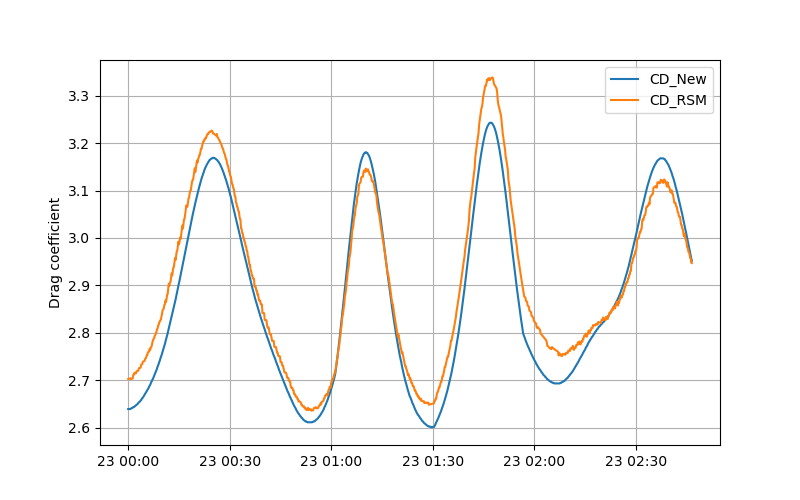

In [100]:
plt.figure(figsize = [8,5])
plt.plot(CHAMP_Data['CD_New (~)'][:1000],label = 'CD_New')
plt.plot(C_D,label = 'CD_RSM')
plt.ylabel('Drag coefficient')
plt.legend()
plt.grid()
# filepath = "C:\\Users\\soumy\\OneDrive - The University of Texas at Dallas\\Documents\\MURI_Project_1\\plots\\"
filepath = "/Users/user/OneDrive - The University of Texas at Dallas/Documents/MURI_Project_1/plots/"
os.chdir(filepath)
filename = 'CHAMP_CD_' + start.strftime("%Y-%m-%d") + '_RSM_CD.png'
plt.savefig(filename,dpi = 100)

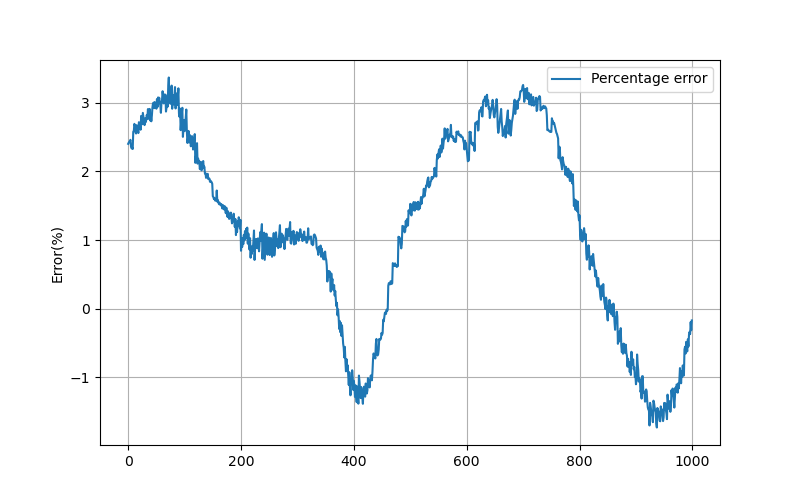

In [101]:
plt.figure(figsize = [8,5])
plt.plot((np.array(C_D['C_D']) - np.array(CHAMP_Data['CD_New (~)'][:1000]))*100/np.array(CHAMP_Data['CD_New (~)'][:1000]) ,label = 'Percentage error')
plt.legend()
plt.grid()
plt.ylabel('Error(%)')
# filepath = "C:\\Users\\soumy\\OneDrive - The University of Texas at Dallas\\Documents\\MURI_Project_1\\plots\\"
filepath = "/Users/user/OneDrive - The University of Texas at Dallas/Documents/MURI_Project_1/plots/"
os.chdir(filepath)
filename = 'CHAMP_CD_' + start.strftime("%Y-%m-%d") + '_RSM_CD_err.png'
plt.savefig(filename,dpi = 100)


In [ ]:
plt.figure(figsize = [10,4])

plt.plot(drag_coeff['C_D'],label = 'C_D(TPMC)')
plt.plot(CHAMP_Data['CD_New (~)'][:3000],label = 'C_D(Mehta)')
plt.legend()
plt.ylabel('Drag co-efficient ($C_{D}$)')


In [ ]:
plt.figure(figsize = [10,4])

plt.plot(GRACE_Data.index[:3000],((np.array(drag_coeff['C_D']) - np.array(GRACE_Data['CD_New (~)'][:3000]))/np.array(GRACE_Data['CD_New (~)'][:3000]))*100,label = 'percentage error')

plt.legend()

In [ ]:
# filepath = "C:\\Users\\soumy\\OneDrive - The University of Texas at Dallas\\Documents\\MURI Project_1\\Data\\Temp\\"
filepath = "/Users/user/OneDrive - The University of Texas at Dallas/Documents/MURI Project_1/Data/Temp/"

os.chdir(filepath)
filename = 'CD_GRACE_08_2005.csv'
drag_coeff.to_csv(filename)


In [ ]:
# def __bootstrap__():
#    global __bootstrap__, __loader__, __file__
#    import sys, pkg_resources, imp
#    __file__ = pkg_resources.resource_filename(__name__,'mylib1.so')
#    __loader__ = None; del __bootstrap__, __loader__
#    imp.load_dynamic(__name__,__file__)
# __bootstrap__()

In [ ]:
begin = time.time()
# for i in range(10):
p1 = subprocess.run(['gcc', '-lgsl','-lgslcblas','-lm','-w','RSM.c','-o','./a.out'])
p2 = subprocess.run(["./a.out"],capture_output=True,text=True)
end = time.time()
print(end-begin)

In [ ]:
for i in range(10):
    frac_O = np.round(mole_frac['frac_O'][i],2); frac_O2 = np.round(mole_frac['frac_O2'][i],2); frac_N = np.round(mole_frac['frac_N'][i],2);
    frac_N2 = np.round(mole_frac['frac_N2'][i],2); frac_He = np.round(mole_frac['frac_He'][i],2); frac_H = np.round(mole_frac['frac_H'][i],2);
    
    xsum = round((frac_O + frac_O2 + frac_N + frac_N2 + frac_H + frac_He) - 1,2)
    
    frac_O = frac_O - xsum
    print(frac_O+frac_O2+frac_N+frac_N2+frac_H+frac_He)

In [ ]:
p1 = subprocess.run(['gcc', 'cfun.c','-o','./a.out'],capture_output=True);
subprocess.run(["./a.out"],capture_output=True,text = True)